<a href="https://colab.research.google.com/github/Kavya2099/British-Airways-virtual-internship/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [8]:
!pip install bs4


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The airline delayed my flig...
1,✅ Trip Verified | I booked a flight for my tra...
2,✅ Trip Verified | Flying on BA104 on 11/09/25...
3,✅ Trip Verified | Flight delayed 1 hr and 8 ...
4,✅ Trip Verified | My wife and I flew from Vanc...


Now we have your dataset for this task! The loops above collected 2000 reviews by iterating through the paginated pages on the website. 

 The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [12]:
df

,reviews
0,✅ Trip Verified | The airline delayed my flig...
1,✅ Trip Verified | I booked a flight for my tra...
2,✅ Trip Verified | Flying on BA104 on 11/09/25...
3,✅ Trip Verified | Flight delayed 1 hr and 8 ...
4,✅ Trip Verified | My wife and I flew from Vanc...
...,...
1995,✅ Verified Review | Paris Orly to New York vi...
1996,✅ Verified Review | Los Angeles to London Hea...
1997,✅ Verified Review | London to Milan Linate. I...
1998,✅ Verified Review | London to Nice return. Br...


Removing the parts before | in the reviews column

In [22]:
df.reviews= df.reviews.str.split('|',expand=True)
df.head()

,reviews
0,The airline delayed my flight from Dublin ca...
1,"I booked a flight for my travel on Oct 10, 20..."
2,Flying on BA104 on 11/09/25 I was disappoint...
3,Flight delayed 1 hr and 8 min. Flight crew ...
4,My wife and I flew from Vancouver (YVR) to Lo...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [23]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,The airline delayed my flight from Dublin ca...,The airline delayed my flight from Dublin cau...
1,"I booked a flight for my travel on Oct 10, 20...",I booked a flight for my travel on Oct Went t...
2,Flying on BA104 on 11/09/25 I was disappoint...,Flying on BA on I was disappointed with the l...
3,Flight delayed 1 hr and 8 min. Flight crew ...,Flight delayed hr and min Flight crew friendl...
4,My wife and I flew from Vancouver (YVR) to Lo...,My wife and I flew from Vancouver YVR to Lond...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [25]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s  0:00:00

   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [click]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   --------------------------

In [26]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...


^C


In [40]:
!pip install nltk

In [41]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Error with downloaded zip file
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Swapnil\AppData\Roaming\nltk_data...


True

In [47]:
from nltk.tokenize import TreebankWordTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet

text = "Dogs are running in the park"
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
tags = pos_tag(tokens)

print("Tokens:", tokens)
print("POS Tags:", tags)
print("Synsets:", wordnet.synsets('dog'))

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng[0m

  Searched in:
    - 'C:\\Users\\Swapnil/nltk_data'
    - 'c:\\Users\\Swapnil\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\Swapnil\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\Swapnil\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\Swapnil\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [48]:
!pip install spacy
!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ------------ --------------------------- 4.5/13.9 MB 26.0 MB/s eta 0:00:01
   ------------------ --------------------- 6.6/13.9 MB 22.3 MB/s eta 0:00:01
   ---------------------------------------  13.9/13.9 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 13.9/13.9 MB 22.9 MB/s  0:00:00
   ---------------------------------------- 0.0/630.6 kB ? eta -:--:--
   ---------------------------------------- 630.6/630.6 kB 14.4 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 26.4 MB/s  0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ----------------------------------- ---- 5.5/6.3 MB 26.8 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 24.1 MB/s  0:00:00
   ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
   -----------------------------------

In [49]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "Dogs are running in the park"
doc = nlp(text)

tokens = [token.text for token in doc]
pos_tags = [(token.text, token.pos_) for token in doc]
lemmas = [(token.text, token.lemma_) for token in doc]

print("Tokens:", tokens)
print("POS Tags:", pos_tags)
print("Lemmas:", lemmas)

Tokens: ['Dogs', 'are', 'running', 'in', 'the', 'park']
POS Tags: [('Dogs', 'NOUN'), ('are', 'AUX'), ('running', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('park', 'NOUN')]
Lemmas: [('Dogs', 'dog'), ('are', 'be'), ('running', 'run'), ('in', 'in'), ('the', 'the'), ('park', 'park')]


In [ ]:
#- STOP_WORDS is SpaCy’s built-in stopword list.
#- token.pos_ returns the POS tag as a string (e.g., 'NOUN', 'VERB').

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to tokenize, remove stopwords, and tag POS
def token_stop_pos_spacy(text):
    doc = nlp(text)
    newlist = []
    for token in doc:
        if token.text.lower() not in STOP_WORDS and token.pos_ in ['ADJ', 'VERB', 'NOUN', 'ADV']:
            newlist.append((token.text, token.pos_))
    return newlist

# Apply to your DataFrame
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos_spacy)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,The airline delayed my flight from Dublin ca...,The airline delayed my flight from Dublin cau...,"[(airline, NOUN), (delayed, VERB), (flight, NO..."
1,"I booked a flight for my travel on Oct 10, 20...",I booked a flight for my travel on Oct Went t...,"[(booked, VERB), (flight, NOUN), (travel, NOUN..."
2,Flying on BA104 on 11/09/25 I was disappoint...,Flying on BA on I was disappointed with the l...,"[(Flying, VERB), (disappointed, VERB), (level,..."
3,Flight delayed 1 hr and 8 min. Flight crew ...,Flight delayed hr and min Flight crew friendl...,"[(delayed, VERB), (hr, NOUN), (min, NOUN), (cr..."
4,My wife and I flew from Vancouver (YVR) to Lo...,My wife and I flew from Vancouver YVR to Lond...,"[(wife, NOUN), (flew, VERB), (business, NOUN),..."


In [51]:
#- Uses SpaCy’s built-in lemmatizer (token.lemma_)
#- Filters out stopwords using nlp.Defaults.stop_words
#- Keeps only relevant POS tags: adjectives, verbs, nouns, adverbs

import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize text while skipping stopwords
def lemmatize_spacy(text):
    doc = nlp(text)
    lemma_rew = " ".join(
        token.lemma_ for token in doc
        if token.text.lower() not in nlp.Defaults.stop_words and token.pos_ in ['ADJ', 'VERB', 'NOUN', 'ADV']
    )
    return lemma_rew

# Apply to your DataFrame
df['Lemma'] = df['Cleaned Reviews'].apply(lemmatize_spacy)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,The airline delayed my flight from Dublin ca...,The airline delayed my flight from Dublin cau...,"[(airline, NOUN), (delayed, VERB), (flight, NO...",airline delay flight cause miss connection ref...
1,"I booked a flight for my travel on Oct 10, 20...",I booked a flight for my travel on Oct Went t...,"[(booked, VERB), (flight, NOUN), (travel, NOUN...",book flight travel ba com book economy seat tr...
2,Flying on BA104 on 11/09/25 I was disappoint...,Flying on BA on I was disappointed with the l...,"[(Flying, VERB), (disappointed, VERB), (level,...",fly disappoint level service provide crew serv...
3,Flight delayed 1 hr and 8 min. Flight crew ...,Flight delayed hr and min Flight crew friendl...,"[(delayed, VERB), (hr, NOUN), (min, NOUN), (cr...",delay hr min crew friendly fasten seatbelt sig...
4,My wife and I flew from Vancouver (YVR) to Lo...,My wife and I flew from Vancouver YVR to Lond...,"[(wife, NOUN), (flew, VERB), (business, NOUN),...",wife fly business class flight original seat s...


In [52]:
df[['reviews','Lemma']]

,reviews,Lemma
0,The airline delayed my flight from Dublin ca...,airline delay flight cause miss connection ref...
1,"I booked a flight for my travel on Oct 10, 20...",book flight travel ba com book economy seat tr...
2,Flying on BA104 on 11/09/25 I was disappoint...,fly disappoint level service provide crew serv...
3,Flight delayed 1 hr and 8 min. Flight crew ...,delay hr min crew friendly fasten seatbelt sig...
4,My wife and I flew from Vancouver (YVR) to Lo...,wife fly business class flight original seat s...
...,...,...
1995,Paris Orly to New York via London. Unlike so...,orly american carrier european carrier beverag...
1996,Los Angeles to London Heathrow. I have to ag...,agree review go far cost cutting service fligh...
1997,London to Milan Linate. I landed in London a...,land take connect flight land p flight leave g...
1998,London to Nice return. British Airways has g...,return go food board arrive hour foudd buggy s...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [53]:
!pip install vaderSentiment

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,The airline delayed my flight from Dublin ca...,The airline delayed my flight from Dublin cau...,"[(airline, NOUN), (delayed, VERB), (flight, NO...",airline delay flight cause miss connection ref...,-0.9022,Negative
1,"I booked a flight for my travel on Oct 10, 20...",I booked a flight for my travel on Oct Went t...,"[(booked, VERB), (flight, NOUN), (travel, NOUN...",book flight travel ba com book economy seat tr...,0.0516,Neutral
2,Flying on BA104 on 11/09/25 I was disappoint...,Flying on BA on I was disappointed with the l...,"[(Flying, VERB), (disappointed, VERB), (level,...",fly disappoint level service provide crew serv...,0.1027,Neutral
3,Flight delayed 1 hr and 8 min. Flight crew ...,Flight delayed hr and min Flight crew friendl...,"[(delayed, VERB), (hr, NOUN), (min, NOUN), (cr...",delay hr min crew friendly fasten seatbelt sig...,0.8807,Positive
4,My wife and I flew from Vancouver (YVR) to Lo...,My wife and I flew from Vancouver YVR to Lond...,"[(wife, NOUN), (flew, VERB), (business, NOUN),...",wife fly business class flight original seat s...,0.2500,Neutral


In [55]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    951
Negative    838
Neutral     211
Name: count, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x180364ffa10>,
 [Text(0.0845823103322326, 1.096743284811383, 'Positive'),
  Text(-0.4368623542004964, -1.0095302291077768, 'Negative'),
  Text(1.2765268272095618, -0.4392940466410737, 'Neutral')],
 [Text(0.04613580563576323, 0.5982236098971179, '47.5%'),
  Text(-0.23828855683663439, -0.5506528522406055, '41.9%'),
  Text(0.8037391134282426, -0.27659254788512044, '10.6%')])

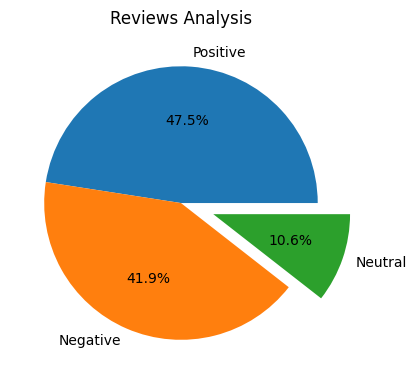

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [57]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [59]:
!pip install wordcloud

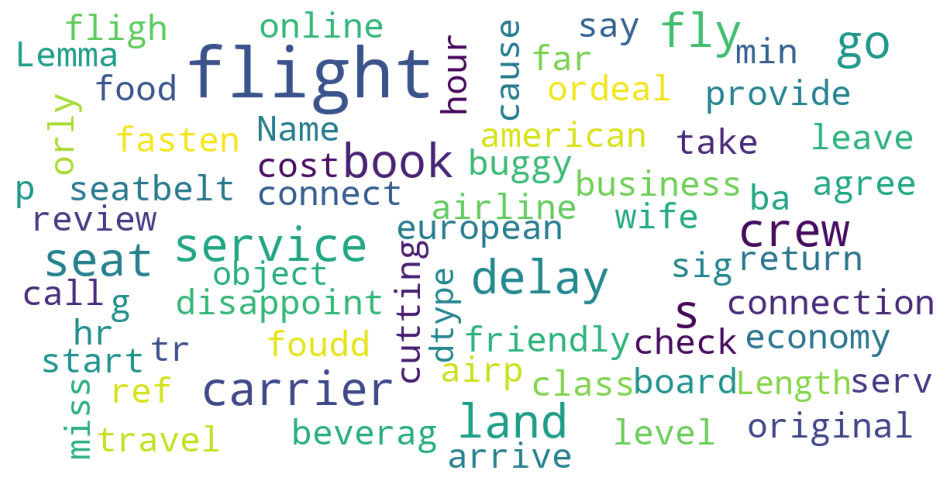

In [60]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)